<a href="https://colab.research.google.com/github/FelipeFerAl/ImageProcessing/blob/main/Talleres/Taller2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUNTO 1
Generar un subset de imágenes mmnist con ruido blanco Gaussiano. Luego crear y_train2 y y_test2 con solo 2 clases:

Si el numero es <5 --> 0; si el numero es >=5 --> 1

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def noisy_images(x_train, x_test):
  """
  Esta función toma los datos de train y test
  y genera otro dataset con imágenes ruidosas.
  Entrada: Conjunto de train y test original
  Salida: Conjunto de train y test ruidoso
  """
  desv = 0.1     #Desviación estándar del ruido

  ruido = np.random.normal(0, desv, x_train.shape)
  ruido2 = np.random.normal(0, desv, x_test.shape)

  train = np.clip(x_train + ruido, 0, 1)
  test = np.clip(x_test + ruido2, 0, 1)
  return train, test

def binary_label(y_train, y_test):
  """
  Esta función toma las etiquetas de train y test
  y genera otras etiquetas para clasificación
  binaria.
  Entrada: Conjunto de etiquetas originales
  Salida: Etiquetas binarias
  """
  y_train2 = np.where(y_train < 5, 0, 1)
  y_test2 = np.where(y_test < 5, 0, 1)
  return y_train2, y_test2

In [4]:
# Carga de la base de datos original
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalización de los datos
x_train = x_train/255
x_test = x_test/255

# Creación de los datasets de imágenes con ruido
x_train2, x_test2 = noisy_images(x_train, x_test)

# Creación de las etiquetas binarias
y_train2, y_test2 = binary_label(y_train, y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


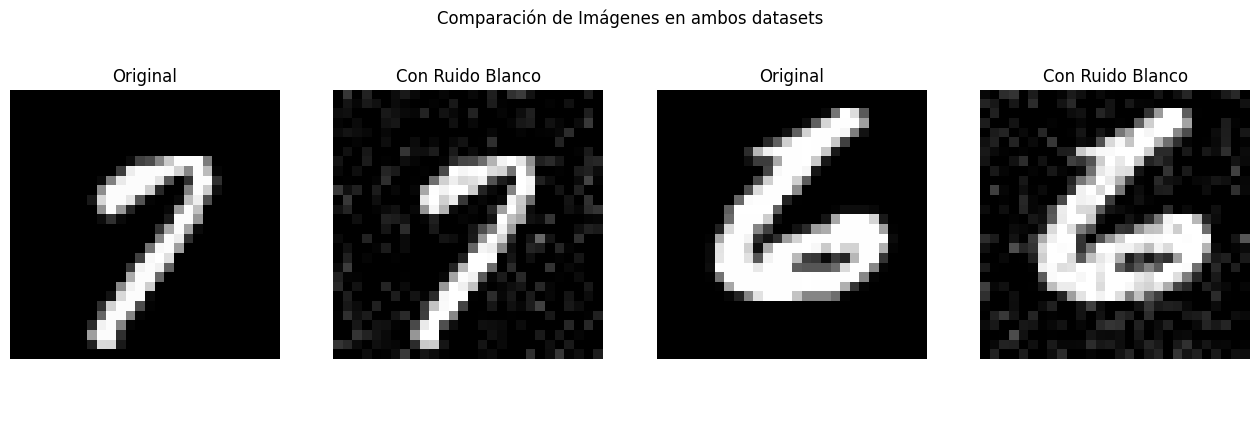

In [20]:
idx = 9999
plt.figure(figsize=(16,5)), plt.title('Comparación de Imágenes en ambos datasets'), plt.axis("off")
plt.subplot(1,4,1), plt.imshow(x_train[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,2), plt.imshow(x_train2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.subplot(1,4,3), plt.imshow(x_test[idx], cmap="gray"), plt.title("Original"), plt.axis("off")
plt.subplot(1,4,4), plt.imshow(x_test2[idx], cmap="gray"), plt.title("Con Ruido Blanco"), plt.axis("off")
plt.show()

In [47]:
# Prueba de las etiquetas
idxs = [435,678,1269,6423]
for idx in idxs:
  print(f"Etiqueta Original: {y_test[idx]} ; Etiqueta Binaria: {y_test2[idx]}")

Etiqueta Original: 8 ; Etiqueta Binaria: 1
Etiqueta Original: 9 ; Etiqueta Binaria: 1
Etiqueta Original: 2 ; Etiqueta Binaria: 0
Etiqueta Original: 2 ; Etiqueta Binaria: 0


CÓDIGO DE LA RED FUNCIONAL

In [7]:
input_1 = tf.keras.layers.Input(shape=(28,28))
input_2 = tf.keras.layers.Input(shape=(28,28))

plano1 = tf.keras.layers.Flatten()(input_1)
plano2 = tf.keras.layers.Flatten()(input_2)

linea1 = tf.keras.layers.Dense(128, activation='relu')(plano1)
linea2 = tf.keras.layers.Dense(64, activation='relu')(plano2)

output1 = tf.keras.layers.Dense(10, activation='softmax')(linea1)
output2 = tf.keras.layers.Dense(1, activation='sigmoid')(linea2)

model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output1, output2])
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy', 'binary_crossentropy'], metrics=['accuracy', 'accuracy'])

In [8]:
model.fit([x_train, x_train2], [y_train, y_train2], epochs=10, validation_data=([x_test, x_test2], [y_test, y_test2]))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - dense_2_accuracy: 0.8729 - dense_2_loss: 0.4388 - dense_3_accuracy: 0.8957 - dense_3_loss: 0.2578 - loss: 0.6965 - val_dense_2_accuracy: 0.9582 - val_dense_2_loss: 0.1402 - val_dense_3_accuracy: 0.9624 - val_dense_3_loss: 0.1109 - val_loss: 0.2512
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - dense_2_accuracy: 0.9620 - dense_2_loss: 0.1259 - dense_3_accuracy: 0.9707 - dense_3_loss: 0.0878 - loss: 0.2137 - val_dense_2_accuracy: 0.9695 - val_dense_2_loss: 0.1006 - val_dense_3_accuracy: 0.9739 - val_dense_3_loss: 0.0792 - val_loss: 0.1800
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - dense_2_accuracy: 0.9753 - dense_2_loss: 0.0835 - dense_3_accuracy: 0.9783 - dense_3_loss: 0.0616 - loss: 0.1451 - val_dense_2_accuracy: 0.9753 - val_dense_2_loss: 0.0836 - val_dense_3_accuracy: 0.9725 - val_dense_3_loss: 0.0806 - val_loss: 0.1645
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - dense_2_accuracy: 0.9816 - d

In [48]:
y_pred1, y_pred2 = model.predict([x_test, x_test2])

y_pred1 = np.argmax(y_pred1, axis=1)
y_pred2 = np.round(y_pred2).astype(int)

for idx in idxs:
  if y_pred2[idx] == 0:
    text = "Menor a 5"
  else:
    text = "5 o Mayor"
  print(f"Etiquetas - Real: {y_test[idx]} ; Predicha: {y_pred1[idx]}; Binaria: {text}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Etiquetas - Real: 8 ; Predicha: 8; Binaria: 5 o Mayor
Etiquetas - Real: 9 ; Predicha: 9; Binaria: 5 o Mayor
Etiquetas - Real: 2 ; Predicha: 2; Binaria: Menor a 5
Etiquetas - Real: 2 ; Predicha: 2; Binaria: Menor a 5


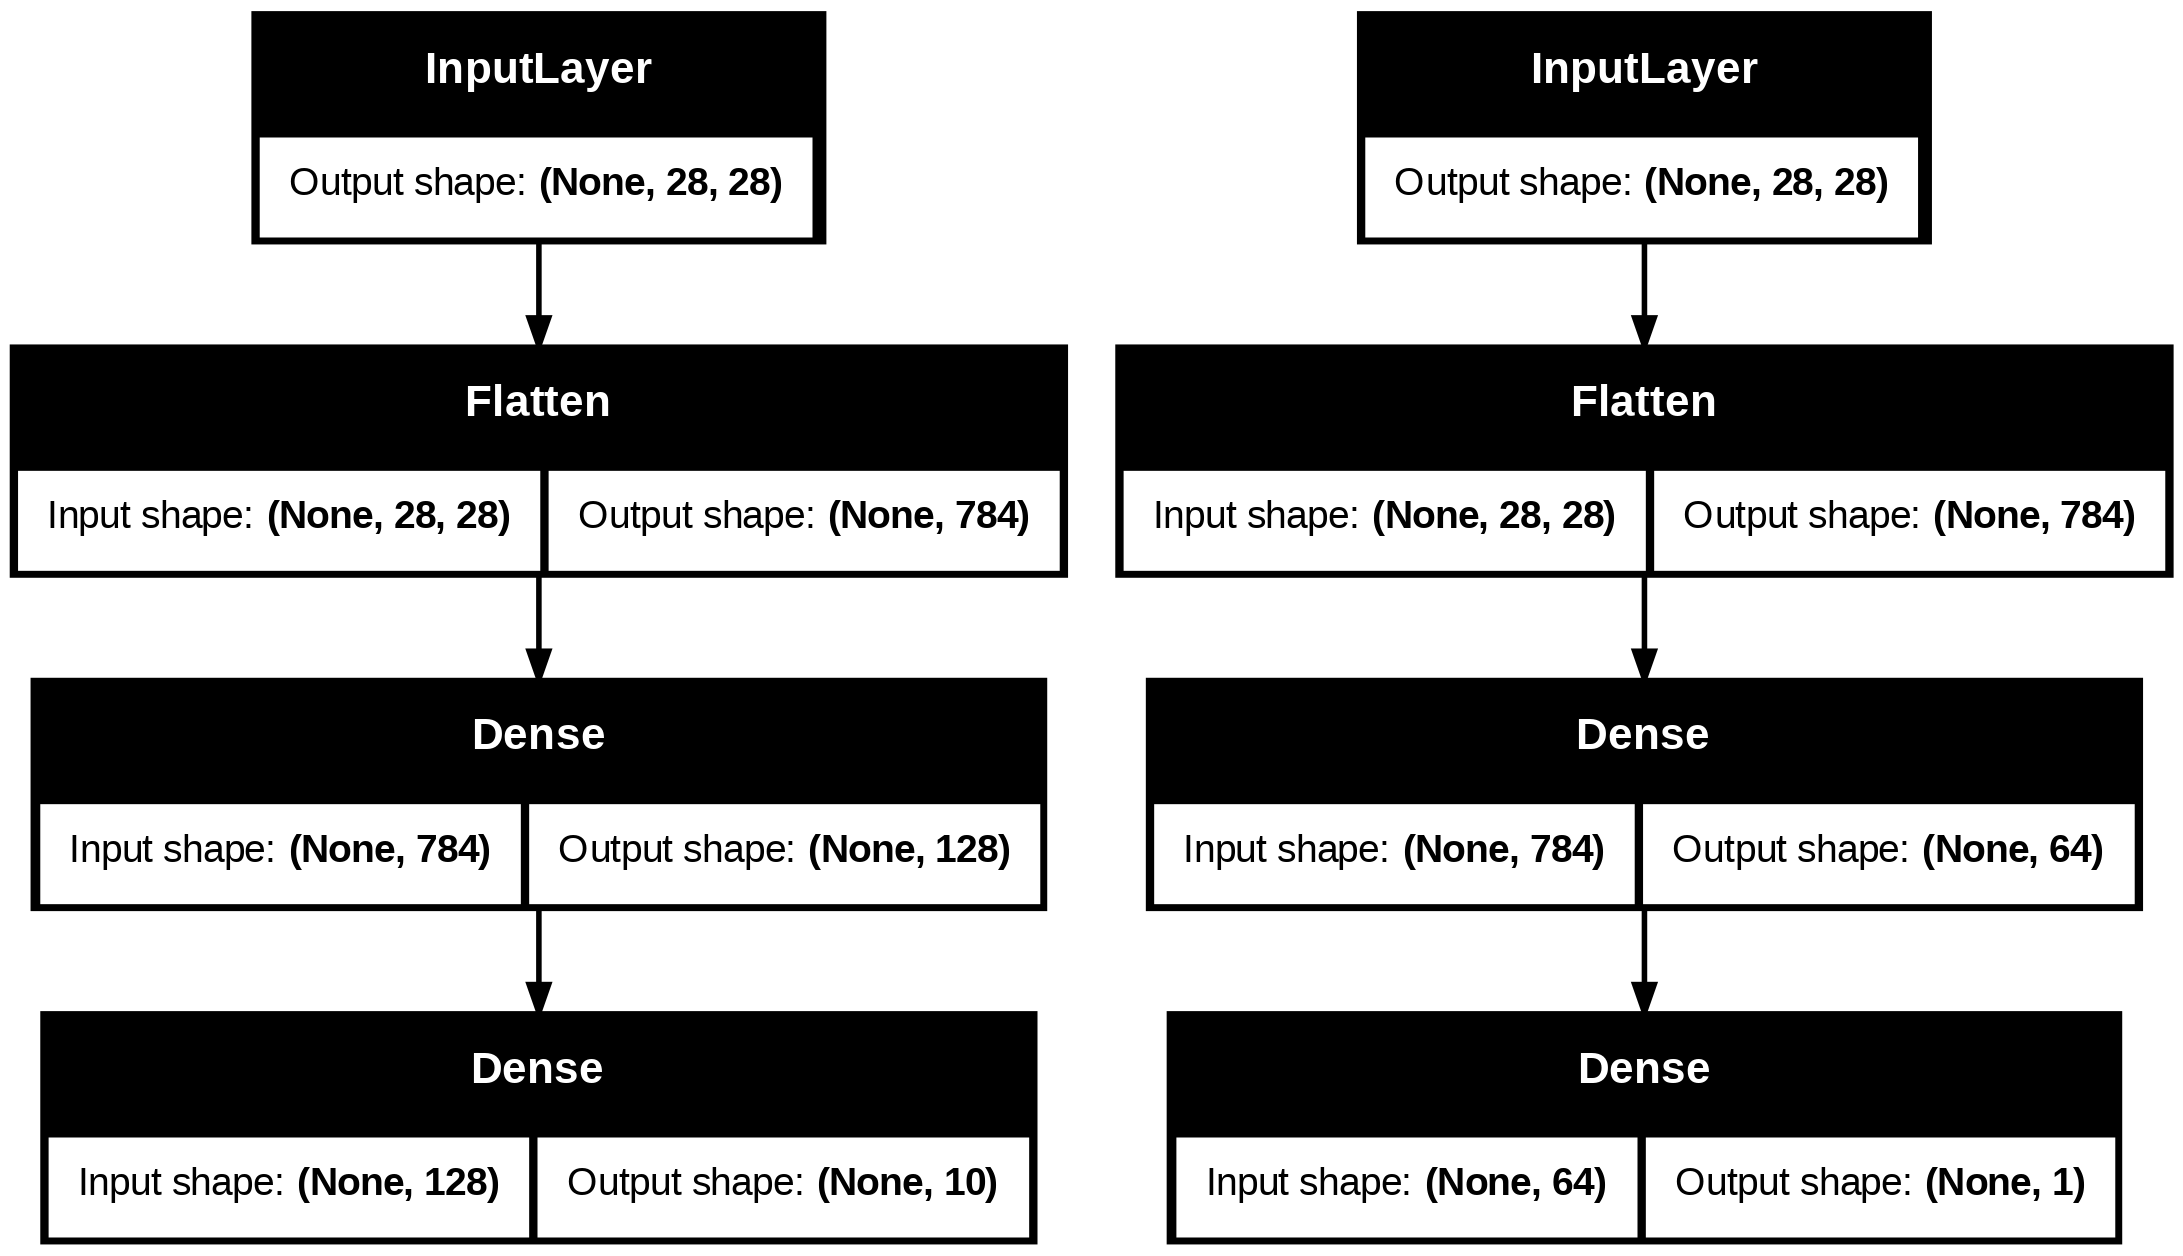

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)